In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import LabelEncoder

In [2]:
trd = pd.read_csv('train.csv')
tsd = pd.read_csv('test.csv')
td = pd.concat([trd, tsd], ignore_index=True, sort = False)

Text(0.5, 1.0, 'Missing values heatmap')

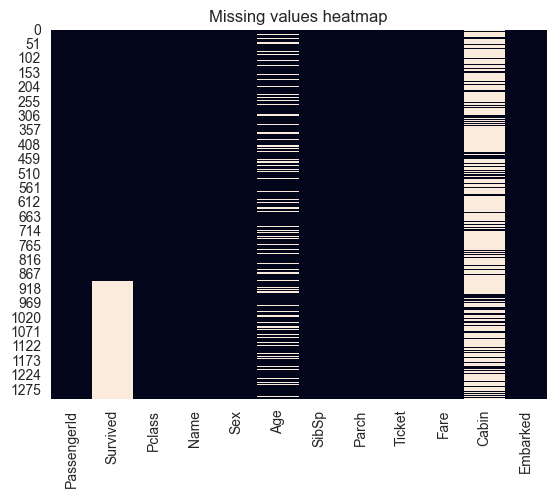

In [3]:
td.isnull().sum()
sns.heatmap(td.isnull(), cbar = False).set_title("Missing values heatmap")

In [4]:
td.Cabin = td.Cabin.fillna('NA')

In [5]:
td['Salutation'] = td.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [6]:
grp = td.groupby(['Sex', 'Pclass'])

In [7]:
grp.Age.apply(lambda x: x.fillna(x.median()))

Sex     Pclass      
female  1       1       38.0
                3       35.0
                11      58.0
                31      36.0
                52      49.0
                        ... 
male    3       1290    31.0
                1304    25.0
                1306    38.5
                1307    25.0
                1308    25.0
Name: Age, Length: 1309, dtype: float64

In [8]:
td.Age = td.Age.fillna(td.Age.median)

Text(0.5, 1.0, 'Missing values heatmap')

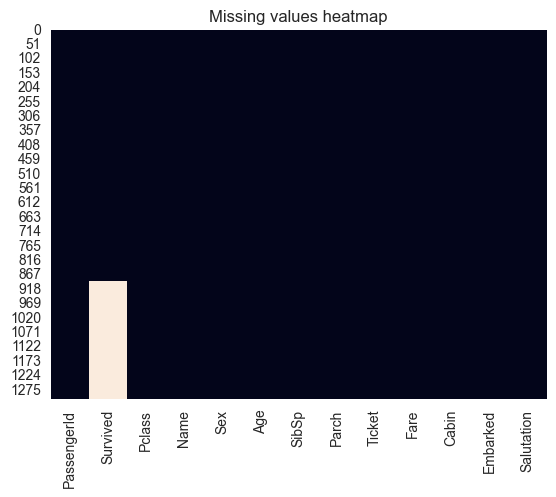

In [9]:
td.isnull().sum()
sns.heatmap(td.isnull(), cbar = False).set_title("Missing values heatmap")

In [10]:
td['Sex'] = LabelEncoder().fit_transform(td['Sex'])

In [11]:
pd.get_dummies(td.Embarked, prefix="Emb", drop_first = True)

,Emb_Q,Emb_S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
1304,False,True
1305,False,False
1306,False,True
1307,False,True


In [12]:
td = pd.concat([td,pd.get_dummies(td.Cabin, prefix="Cabin"), pd.get_dummies(td.Embarked, prefix="Emb", drop_first = True), pd.get_dummies(td.Salutation, prefix="Title", drop_first = True), pd.get_dummies(td.Pclass, prefix="Class", drop_first = True)], axis=1)

In [13]:
td['Sex'] = LabelEncoder().fit_transform(td['Sex'])

In [14]:
td.drop(['Fare','Cabin','Name','Salutation', 'Ticket','Embarked', 'Age'], axis=1, inplace=True)

In [15]:
X_to_be_predicted = td[td.Survived.isnull()]
X_to_be_predicted = X_to_be_predicted.drop(['Survived'], axis = 1)

In [16]:
train_data = td
train_data = train_data.dropna()
feature_train = train_data['Survived']
label_train = train_data.drop(['Survived'], axis = 1)

RF Accuracy: 81.56%
The cross validated score for Random forest is: 82.03


Text(0.5, 1.05, 'Confusion_matrix for RF')

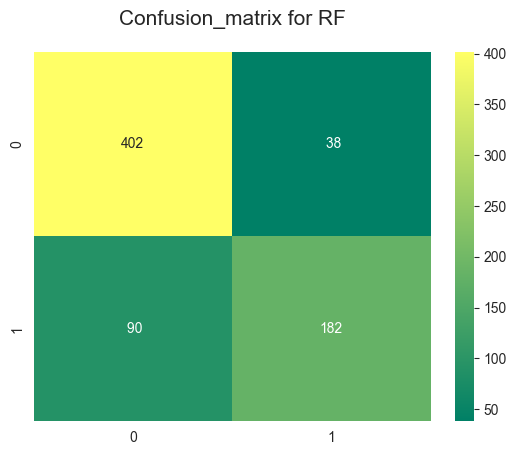

In [17]:
clf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
x_train, x_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)
clf.fit(x_train,  np.ravel(y_train))
print("RF Accuracy: "+repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")

result_rf=cross_val_score(clf,x_train,y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))
y_pred = cross_val_predict(clf,x_train,y_train,cv=10)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for RF', y=1.05, size=15)

In [18]:
result = clf.predict(X_to_be_predicted)
submission = pd.DataFrame({'PassengerId':X_to_be_predicted.PassengerId,'Survived':result})
submission.Survived = submission.Survived.astype(int)
print(submission.shape)
filename = 'Titanic Predictions.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

(418, 2)
Saved file: Titanic Predictions.csv
